In [11]:
# Denver coordinates = [39.742043, -104.991531]
# Tokyo coordinates = [35.6804, 139.7690]
# Beijing coordinates = [39.9042, 116.4074]

In [12]:
# Find the Distance between Denver and Tokyo
# https://www.nhc.noaa.gov/gccalc.shtml

In [13]:
# Read Package Installation guide: https://notebooks.azure.com/help/jupyter-notebooks/package-installation
#  !conda install <pkg name> -y 
# or
#  !pip install <pkg name> 
# note Your packages will only be available for the lifetime of your notebook server. 
# Your notebook server will typically shutdown after 1 hour of inactivity

In [14]:
!pip install geopy

In [15]:
import geopy.distance

denver_coords = (39.742043, -104.991531)
tokyo_coords = (35.6804, 139.7690)

print(geopy.distance.distance(denver_coords, tokyo_coords).km)

9348.60953986624


In [16]:
# The Haversine Formula
# source: https://community.esri.com/groups/coordinate-reference-systems/blog/2017/10/05/haversine-formula

In [17]:
from math import sin, cos, sqrt, atan2, radians

# approximate radius of earth in km
R = 6373.0

lat_coord1 = radians(39.742043)
lon_coord1 = radians(-104.991531)
lat_coord2 = radians(35.6804)
lon_coord2 = radians(139.7690)

dlon = lon_coord2 - lon_coord1
dlat = lat_coord2 - lat_coord1

a = sin(dlat / 2)**2 + cos(lat_coord1) * cos(lat_coord2) * sin(dlon / 2)**2
c = 2 * atan2(sqrt(a), sqrt(1 - a))

distance = R * c

print("Result is:", distance, "km")

Result is: 9330.205443837753 km


In [18]:
# What is the total distance from Tokyo to Beijing ?
# What is the total distnace from Denver to Beijing then to Tokyo ?

In [19]:
# Hurricane path calculation
# First load the file
import pandas as pd
df_hur = pd.read_csv('hurricane_nodes.csv')

# find unique hurricane ids
# print out all columns names first
print(list(df_hur))
# unique ids
unique_ids = df_hur.hurricane_id.unique()
print(unique_ids)

['Lon', 'Lat', 'hurricane_id']
['r01' 'r03' 'r06' 'r08' 'r09' 'r11' 'r12' 'r15' 'r16' 'r19']


In [20]:
# Now change the distance formulat into equation
def distance_cal(lat_coord1,lon_coord1,lat_coord2,lon_coord2):
    R = 6373.0
    lat_coord1 = radians(lat_coord1)
    lon_coord1 = radians(lon_coord1)
    lat_coord2 = radians(lat_coord2)
    lon_coord2 = radians(lon_coord2)

    dlon = lon_coord2 - lon_coord1
    dlat = lat_coord2 - lat_coord1

    a = sin(dlat / 2)**2 + cos(lat_coord1) * cos(lat_coord2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    
    distance = R * c
    
    return distance
    
# Create a empty data frame and append results
df_results = pd.DataFrame(columns=['Hurrican_id', 'Distance'])

for hur_id in unique_ids:
    df_hur_sub = df_hur[df_hur['hurricane_id'] == hur_id]
    print(len(df_hur_sub))
    lats = df_hur_sub['Lat'].tolist()
    lons = df_hur_sub['Lon'].tolist()
    tot_nodes = len(lats)
    i = 0
    total_distance = 0
    while i < tot_nodes-1:
        lat1 = lats[i]
        lon1 = lons[i]
        lat2 = lats[i+1]
        lon2 = lons[i+1]
        # distance = distance_cal(lat1,lon1,lat2,lon2)
        #print((lat1,lon1,lat2,lon2))
        total_distance = total_distance+distance_cal(lat1,lon1,lat2,lon2)
        i = i+1
    print(hur_id,total_distance)
    df_results = df_results.append({'Hurrican_id': hur_id, 'Distance': total_distance}, ignore_index=True)

1820
r01 5428.376642927042
6188
r03 21913.302375632637
2184
r06 2479.46408966402
14924
r08 40400.3522032599
22204
r09 54541.742476625084
60424
r11 197740.4016970612
66612
r12 190656.23114791233
58604
r15 204739.88472619402
9828
r16 22348.993671601853
4693
r19 17342.06659777549


In [21]:
print(df_results.sort_values('Distance', ascending = False))

  Hurrican_id       Distance
7         r15  204739.884726
5         r11  197740.401697
6         r12  190656.231148
4         r09   54541.742477
3         r08   40400.352203
8         r16   22348.993672
1         r03   21913.302376
9         r19   17342.066598
0         r01    5428.376643
2         r06    2479.464090


In [22]:
# Assignment Q1

In [23]:
# Develop a way to find out which Hurricane is closest to Hurricane r01
# You can make your own assumptions here to define your threshold for data processing
# e.g., - Note since hurrican paths contain different number of nodes
# you can filter and select the same amount of points for calculation
# however,you need to start from the first point 
# e.g, if r01 has points 1-100, r02 has points 1-200, make sure you want to use points 1-100 from r01 and r02 for ca calculation

1) get coordinates for first hurricane    
2) create container for hurricane distances   
3) go through each hurricane      
    4) get coordinates for current hurricane      
    5) get total distance between all coordinates of first hurricane and all coordinates of current hurricane       
    6) divide total distance by the total number of points        
    7) append hurricane distance to hurricane distances container       
8) get smallest hurricane distance from huricane distances container      

In [37]:
import pandas as pd

hurricanes = pd.read_csv('hurricane_nodes.csv')
unique_ids = hurricanes.hurricane_id.unique()[1:]

hurricane1 = hurricanes[hurricanes['hurricane_id'] == 'r01']
hurricane1lats = hurricane1['Lat'].tolist()
hurricane1longs = hurricane1['Lon'].tolist()

hurricane_distances = {}
for h in unique_ids:
    current_hurricane = hurricanes[hurricanes['hurricane_id'] == h]
    current_hurricane_lats = current_hurricane['Lat'].tolist()
    current_hurricane_longs = current_hurricane['Lon'].tolist()
    point_distances = []
    for i in range(len(hurricane1lats)):
        for j in range(len(current_hurricane_lats)):
            point_distance = distance_cal(hurricane1lats[i],hurricane1longs[i],current_hurricane_lats[j],current_hurricane_longs[j])
            point_distances.append(point_distance)
    hurricane_distance = (sum(point_distances))/(len(hurricane1lats) + len(current_hurricane_lats))
    hurricane_distances[h] = hurricane_distance
    
minimum = []
m = min(hurricane_distances.values())
for k,v in hurricane_distances.items():
    if v == m:
        minimum.append(k)

In [41]:
minimum[0]


'r19'

In [ ]:
# Assignment Q2
# Produce the flight path map for another country - e.g., Mexio or China

In [74]:
import math
import json
import numpy as np
import pandas as pd
import networkx as nx
#import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from IPython.display import Image
%matplotlib inline
colnames = ['airline','airline_id','source','source_id','dest','dest_id','codeshare','stops','equipment']
routes = pd.read_csv(
    'https://raw.githubusercontent.com/ipython-books/cookbook-2nd-data/master/routes.dat?raw=true',
    names=colnames,
    header=None)
print(routes.head())

  airline airline_id source source_id dest dest_id codeshare  stops equipment
0      2B        410    AER      2965  KZN    2990       NaN      0       CR2
1      2B        410    ASF      2966  KZN    2990       NaN      0       CR2
2      2B        410    ASF      2966  MRV    2962       NaN      0       CR2
3      2B        410    CEK      2968  KZN    2990       NaN      0       CR2
4      2B        410    CEK      2968  OVB    4078       NaN      0       CR2


In [75]:
# keep all India data
names = ('id,name,city,country,iata,icao,lat,lon,'
         'alt,timezone,dst,tz,type,source').split(',')

airports = pd.read_csv(
    'https://github.com/ipython-books/'
    'cookbook-2nd-data/blob/master/'
    'airports.dat?raw=true',
    header=None,
    names=names,
    index_col=4,
    na_values='\\N')
airports_india = airports[airports['country'] ==
                       'India']
print(airports_india.head())

# India routes
airports_india_list = airports_india.index.tolist()
# select source in airport india
print(routes.head())
routes_india = routes[routes['source'].isin(airports_india_list)]
# select destinatin in airport india
routes_india = routes_india[routes_india['dest'].isin(airports_india_list)]
print(list(routes))

        id                                            name        city  \
iata                                                                     
AMD   2994  Sardar Vallabhbhai Patel International Airport   Ahmedabad   
AKD   2995                                   Akola Airport       Akola   
IXU   2996                              Aurangabad Airport  Aurangabad   
BOM   2997       Chhatrapati Shivaji International Airport      Mumbai   
PAB   2998                                Bilaspur Airport    Bilaspur   

     country  icao        lat        lon   alt  timezone dst             tz  \
iata                                                                          
AMD    India  VAAH  23.077200  72.634697   189       5.5   N  Asia/Calcutta   
AKD    India  VAAK  20.698999  77.058601   999       5.5   N  Asia/Calcutta   
IXU    India  VAAU  19.862700  75.398102  1911       5.5   N  Asia/Calcutta   
BOM    India  VABB  19.088699  72.867897    39       5.5   N  Asia/Calcutta   
PAB    

In [77]:
# construct flight network
# airports are nodes
# construct the list of edges

edges = routes_india[['source', 'dest']].values
print(edges)

[['AMD' 'BLR']
 ['AMD' 'BOM']
 ['AMD' 'CCU']
 ...
 ['VNS' 'DEL']
 ['VTZ' 'BLR']
 ['VTZ' 'MAA']]


In [78]:
# create the networkX graph from the edges array
g = nx.from_edgelist(edges)

In [79]:
# check networks statistics
len(g.nodes()), len(g.edges())

(68, 179)

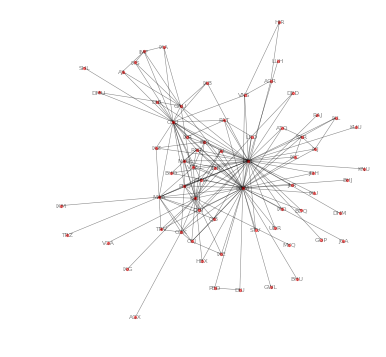

In [80]:
# plot the graph
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_networkx(g, ax=ax, node_size=5,
                 font_size=6, alpha=.5,
                 width=.5)
ax.set_axis_off()

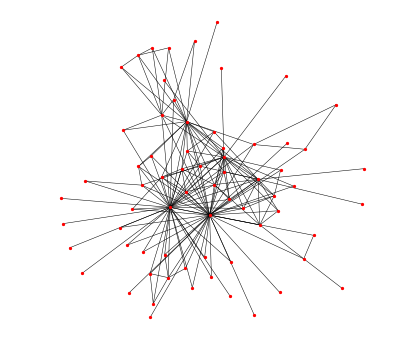

In [81]:
# keep the largest connected component 
# sg = next(nx.connected_component_subgraphs(g))
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)
sg = next(connected_component_subgraphs(g))

# and plot
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_networkx(sg, ax=ax, with_labels=False,
                 node_size=5, width=.5)
ax.set_axis_off()

In [82]:
# prepare final graph
# create a dictionary based on IATA codes for airports

# reset index
airports_india_unique = airports_india.loc[~airports_india.index.duplicated(keep='first')]

pos = {airport: (v['lon'], v['lat'])
        for airport, v in
        airports_india_unique.to_dict('index').items()}

!pip install mplleaflet
import mplleaflet
fig, ax = plt.subplots()

nx.draw_networkx_nodes(sg,pos=pos,node_size=10,node_color='red',edge_color='k',alpha=.5, with_labels=False)
nx.draw_networkx_edges(sg,pos=pos,edge_color='gray', alpha=.1)
nx.draw_networkx_labels(sg,pos, label_pos =10.3)

mplleaflet.display(fig=ax.figure)

C:\Users\Jessica\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\display.py:689: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


In [71]:
# Bonus question:
# Find a trajectory dataset online and plot them using NetworkX template - paths with multiple nodes and edges 

#coronavirus data: https://www.kaggle.com/anjanatiha/corona-virus-time-series-dataset/data#time_series_19-covid-Confirmed.csv
cv = pd.read_csv('coronavirusdata.csv')

l = []
for idx, r in cv.iterrows():

    r = list(r[4:])

    for i in range(len(r)):
        if i < len(r)-1:
            l.append([r[i], r[i+1]])
            
for idx, r in cv.iterrows():
   print(list(r[4:]))

[1, 9, 15, 39, 60, 70, 106, 152, 200, 237, 297, 340, 408, 480, 530, 591, 665, 733, 779, 830, 860, 889, 910, 934, 950, 962, 973, 982, 986, 987, 988, 989, 989, 989, 989, 989, 989]
[14, 22, 36, 41, 68, 80, 91, 111, 114, 139, 168, 191, 212, 228, 253, 274, 297, 315, 326, 337, 342, 352, 366, 372, 375, 380, 381, 387, 393, 395, 396, 399, 399, 399, 400, 400, 410]
[6, 9, 27, 57, 75, 110, 132, 147, 182, 211, 247, 300, 337, 366, 389, 411, 426, 428, 468, 486, 505, 518, 529, 537, 544, 551, 553, 555, 560, 567, 572, 573, 575, 576, 576, 576, 576]
[1, 5, 10, 18, 35, 59, 80, 84, 101, 120, 144, 159, 179, 194, 205, 215, 224, 239, 250, 261, 267, 272, 279, 281, 285, 287, 290, 292, 293, 293, 293, 293, 293, 293, 294, 294, 296]
[0, 2, 2, 4, 7, 14, 19, 24, 26, 29, 40, 51, 55, 57, 62, 62, 67, 79, 83, 83, 86, 87, 90, 90, 90, 90, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91, 91]
[26, 32, 53, 78, 111, 151, 207, 277, 354, 436, 535, 632, 725, 813, 895, 970, 1034, 1095, 1131, 1159, 1177, 1219, 1241, 1261, 1294, 1316, 1322, 1

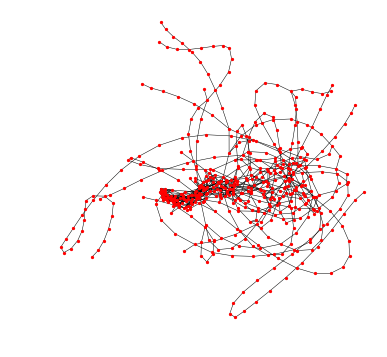

In [72]:
g = nx.from_edgelist(l)
def connected_component_subgraphs(G):
    for c in nx.connected_components(G):
        yield G.subgraph(c)
sg = next(connected_component_subgraphs(g))

#plot
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
nx.draw_networkx(sg, ax=ax, with_labels=False,
                 node_size=5, width=.5)
ax.set_axis_off()